# NAME : C.Harshitha

# TASK 2:prediction using unsupervised ML

# k-means Clustering

**PROBLEM STATEMENT**

FROM THE GIVEN  IRIS DATASET,PREDICT THE OPTIMUM NUMBER OF CLUSTERS AND REPRESENT THEM VISUALLY.

***IMPORT THE DATA***

In [109]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets



In [110]:
# Load the iris dataset
iris= datasets.load_iris()


In [111]:
irisdf= pd.DataFrame(iris.data, columns = iris.feature_names)

In [112]:
# See the first 5 rows
irisdf.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [113]:
# See the lastt 5 rows
irisdf.tail() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [114]:
#find no of rows and columns
irisdf.shape

(150, 4)

In [115]:
#to see columns
irisdf.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [116]:
#check for null values and  dtypes of columns
irisdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [117]:
#check for statsical data
irisdf.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [118]:
x = irisdf.iloc[:, [0, 1, 2, 3]].values


In [119]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [120]:
X=irisdf[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

In [121]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


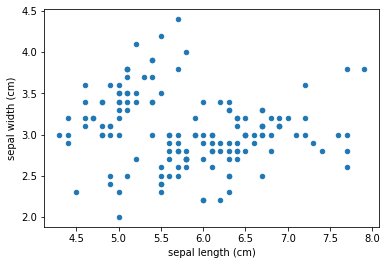

In [122]:
X.plot(x='sepal length (cm)',y='sepal width (cm)',kind='scatter')
#I tried to observe the no of clusters ,but i couldn't figured it out with this plot. 

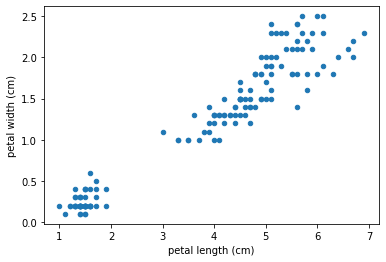

In [123]:
X.plot(x='petal length (cm)',y='petal width (cm)',kind='scatter')
#I tried to observe the no of clusters ,but i couldn't figured it out with this plot. 

# Finding the optimum number of clusters for k-means classification

In [124]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,15):
   km=KMeans(n_clusters = i)
   km.fit(X)
   wcss.append(km.inertia_)



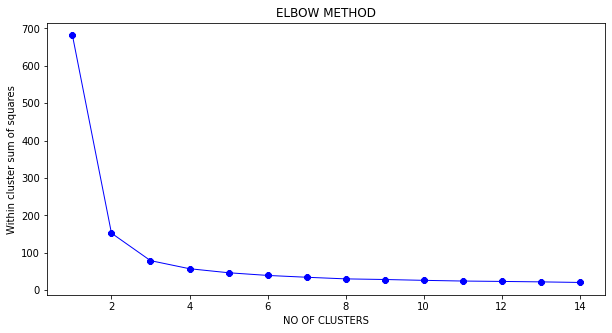

In [125]:
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss,linewidth=1,color='blue',marker='8')
plt.title('ELBOW METHOD')
plt.xlabel('NO OF CLUSTERS')
plt.ylabel('Within cluster sum of squares')
plt.show()

#### 'The elbow method' from the above graph, the optimum clusters are where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.From this we choose the number of clusters as 4.

In [126]:
#applying k-means
km=KMeans(n_clusters=4)

In [127]:
#model building
kmmodel=km.fit(X)

In [128]:
#predicting 
X['KMeans_cluster']=kmmodel.predict(X)

In [129]:
X['KMeans_cluster']

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    0
148    2
149    0
Name: KMeans_cluster, Length: 150, dtype: int32

In [130]:
X.groupby(X['KMeans_cluster']).agg(['count','mean'])

sepal length (cm)            ... petal width (cm)          
                           count      mean  ...            count      mean
KMeans_cluster                              ...                           
0                             40  6.252500  ...               40  1.625000
1                             50  5.006000  ...               50  0.246000
2                             32  6.912500  ...               32  2.131250
3                             28  5.532143  ...               28  1.228571

[4 rows x 8 columns]

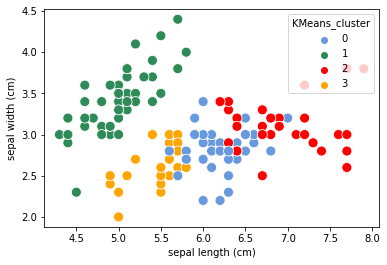

In [131]:
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue='KMeans_cluster',palette=['#69d','seagreen','red','orange'],data=X,s=100)

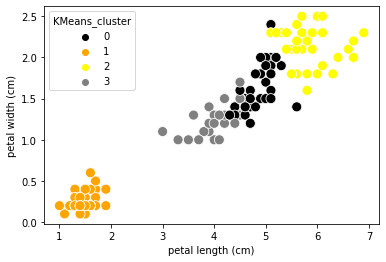

In [132]:
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',hue='KMeans_cluster',palette=['black','orange','yellow','grey'],data=X,s=100)

In [133]:
kmmodel.cluster_centers_

array([[6.2525    , 2.855     , 4.815     , 1.625     ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143]])

In [134]:
from sklearn.metrics import silhouette_score

In [135]:
silhouette_score(X,X.KMeans_cluster)

0.7191904432063946

####Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 

1: Means clusters are well apart from each other and clearly distinguished.